In [1]:
%%time

!pip install datasets

CPU times: user 194 ms, sys: 32 ms, total: 226 ms
Wall time: 12.7 s


In [2]:
%%time

from datasets import get_dataset_split_names, load_dataset, load_dataset_builder

# Retrieving the 'multi_nli' dataset from huggingface

ds_builder = load_dataset_builder('multi_nli')
print ('Dataset Description :-', ds_builder.info.description, '\n')
print ('Dataset Information Features :-', ds_builder.info.features, '\n')

print ('Types of datasets :-', get_dataset_split_names('multi_nli'), '\n')

train_dataset = load_dataset('multi_nli', split='train[:3%]')
validation_matched_dataset = load_dataset('multi_nli', split='validation_matched[:30%]')
validation_mismatched_dataset = load_dataset('multi_nli', split='validation_mismatched[:30%]')
print ('Train dataset :-', train_dataset, '\n')
print ('Validation Matched dataset :-', validation_matched_dataset, '\n')
print ('Validation Mismatched Dataset :-', validation_mismatched_dataset, '\n')

print ('Datatype of the datasets :-', type(train_dataset))

Dataset Description :- The Multi-Genre Natural Language Inference (MultiNLI) corpus is a
crowd-sourced collection of 433k sentence pairs annotated with textual
entailment information. The corpus is modeled on the SNLI corpus, but differs in
that covers a range of genres of spoken and written text, and supports a
distinctive cross-genre generalization evaluation. The corpus served as the
basis for the shared task of the RepEval 2017 Workshop at EMNLP in Copenhagen.
 

Dataset Information Features :- {'promptID': Value(dtype='int32', id=None), 'pairID': Value(dtype='string', id=None), 'premise': Value(dtype='string', id=None), 'premise_binary_parse': Value(dtype='string', id=None), 'premise_parse': Value(dtype='string', id=None), 'hypothesis': Value(dtype='string', id=None), 'hypothesis_binary_parse': Value(dtype='string', id=None), 'hypothesis_parse': Value(dtype='string', id=None), 'genre': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=3, names=['entailment', 'neutral

Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating validation_matched split:   0%|          | 0/9815 [00:00<?, ? examples/s]

Generating validation_mismatched split:   0%|          | 0/9832 [00:00<?, ? examples/s]

Dataset multi_nli downloaded and prepared to /root/.cache/huggingface/datasets/multi_nli/default/0.0.0/591f72eb6263d1ab527561777936b199b714cda156d35716881158a2bd144f39. Subsequent calls will reuse this data.
Train dataset :- Dataset({
    features: ['promptID', 'pairID', 'premise', 'premise_binary_parse', 'premise_parse', 'hypothesis', 'hypothesis_binary_parse', 'hypothesis_parse', 'genre', 'label'],
    num_rows: 11781
}) 

Validation Matched dataset :- Dataset({
    features: ['promptID', 'pairID', 'premise', 'premise_binary_parse', 'premise_parse', 'hypothesis', 'hypothesis_binary_parse', 'hypothesis_parse', 'genre', 'label'],
    num_rows: 2944
}) 

Validation Mismatched Dataset :- Dataset({
    features: ['promptID', 'pairID', 'premise', 'premise_binary_parse', 'premise_parse', 'hypothesis', 'hypothesis_binary_parse', 'hypothesis_parse', 'genre', 'label'],
    num_rows: 2950
}) 

Datatype of the datasets :- <class 'datasets.arrow_dataset.Dataset'>
CPU times: user 54.2 s, sys: 4.01

In [3]:
%%time

# Exploring the format of the datasets

print ('1st entry in the train dataset :-\n', train_dataset[0])
print ('Type of the 1st entry in the train dataset :-', type(train_dataset[0]))
print ('\nNumber of entries in the trainset :', len(train_dataset))
print ('Number of entries in the validation matched set :', len(validation_matched_dataset))
print ('Number of entries in the validation mismatched set :', len(validation_mismatched_dataset))

1st entry in the train dataset :-
 {'promptID': 31193, 'pairID': '31193n', 'premise': 'Conceptually cream skimming has two basic dimensions - product and geography.', 'premise_binary_parse': '( ( Conceptually ( cream skimming ) ) ( ( has ( ( ( two ( basic dimensions ) ) - ) ( ( product and ) geography ) ) ) . ) )', 'premise_parse': '(ROOT (S (NP (JJ Conceptually) (NN cream) (NN skimming)) (VP (VBZ has) (NP (NP (CD two) (JJ basic) (NNS dimensions)) (: -) (NP (NN product) (CC and) (NN geography)))) (. .)))', 'hypothesis': 'Product and geography are what make cream skimming work. ', 'hypothesis_binary_parse': '( ( ( Product and ) geography ) ( ( are ( what ( make ( cream ( skimming work ) ) ) ) ) . ) )', 'hypothesis_parse': '(ROOT (S (NP (NN Product) (CC and) (NN geography)) (VP (VBP are) (SBAR (WHNP (WP what)) (S (VP (VBP make) (NP (NP (NN cream)) (VP (VBG skimming) (NP (NN work)))))))) (. .)))', 'genre': 'government', 'label': 1}
Type of the 1st entry in the train dataset :- <class 'dic

In [4]:
%%time

# Exploring a few more rows of the multi_nli dataset

for i in range(10):
    print (i)
    print (train_dataset[i]['premise'])
    print (train_dataset[i]['hypothesis'])
    print (train_dataset[i]['genre'])
    print (train_dataset[i]['label'], '\n')

0
Conceptually cream skimming has two basic dimensions - product and geography.
Product and geography are what make cream skimming work. 
government
1 

1
you know during the season and i guess at at your level uh you lose them to the next level if if they decide to recall the the parent team the Braves decide to call to recall a guy from triple A then a double A guy goes up to replace him and a single A guy goes up to replace him
You lose the things to the following level if the people recall.
telephone
0 

2
One of our number will carry out your instructions minutely.
A member of my team will execute your orders with immense precision.
fiction
0 

3
How do you know? All this is their information again.
This information belongs to them.
fiction
0 

4
yeah i tell you what though if you go price some of those tennis shoes i can see why now you know they're getting up in the hundred dollar range
The tennis shoes have a range of prices.
telephone
1 

5
my walkman broke so i'm upset now i 

In [5]:
%%time

# Exploring the train dataset a bit more

genres, labels = {}, {}
for train_data in train_dataset:
    genre, label = train_data['genre'], train_data['label']
    if genre not in genres:
        genres[genre] = 1
    else:
        genres[genre] += 1
    if label not in labels:
        labels[label] = 1
    else:
        labels[label] += 1
    
print (genres)
print (labels)

{'government': 2373, 'telephone': 2435, 'fiction': 2417, 'travel': 2227, 'slate': 2329}
{1: 3407, 0: 4012, 2: 4362}
CPU times: user 1.4 s, sys: 3.12 ms, total: 1.41 s
Wall time: 1.41 s


In [6]:
%%time

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet2022')

! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.
CPU times: user 930 ms, sys: 210 ms, total: 1.14 s
Wall time: 2.79 s


In [7]:
%%time

from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Segregating the train, validation and test datasets

'''
Map POS tag to 1st character lemmatize() accepts
'''
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {'J' : wordnet.ADJ, 'N' : wordnet.NOUN, 'V' : wordnet.VERB, 'R' : wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


'''
Steps followed :-
(1) Word-Level Tokenization
(2) Removal of Stopwords
(3) Lemmatization
'''
def generate_X_y_datasets(dataset):
    X, y = [], []
    for data in dataset:
        premise, hypothesis, label = data['premise'], data['hypothesis'], data['label']
        sentence = premise + ' ' + hypothesis
        text_tokens = word_tokenize(sentence)
        tokens_without_stopwords = [word for word in text_tokens if not word in stop_words]
        sentence_without_stopwords = (' ').join(tokens_without_stopwords)
        tokens = word_tokenize(sentence_without_stopwords)
        lemmatized_sentence_list = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokens]
        lemmatized_sentence = (' ').join(lemmatized_sentence_list)
        X.append(lemmatized_sentence)
        y.append(label)
    return X, y


X_train, y_train = generate_X_y_datasets(train_dataset)
X_validation_matched, y_validation_matched = generate_X_y_datasets(validation_matched_dataset)
X_validation_mismatched, y_validation_mismatched = generate_X_y_datasets(validation_mismatched_dataset)

CPU times: user 1min, sys: 4.88 s, total: 1min 5s
Wall time: 1min 5s


In [8]:
%%time

'''
Creating a mapping from word index to a specific word
'''
def create_trainset_mappings(dataset):
    vocabulary = {}
    vocabulary['<PAD>'] = 0
    vocabulary['<UNK>'] = 1
    index = 2
    for sentence in dataset:
        for word in sentence.split():
            if word not in vocabulary:
                vocabulary[word] = index
                index += 1
    return vocabulary
    

train_vocabulary = create_trainset_mappings(X_train)
print ('Size of the vocabulary of the train dataset :', len(train_vocabulary))

Size of the vocabulary of the train dataset : 22863
CPU times: user 41.2 ms, sys: 3.02 ms, total: 44.2 ms
Wall time: 43.3 ms


In [9]:
%%time

'''
Creating corresponding mappings for validation and test data on the basis of the mappings 
created for the train dataset
'''
def create_mapped_dataset(train_vocab, dataset):
    mapped_dataset = []
    max_sentence_len = 0
    for sentence in dataset:
        mapped_sentence = []
        for word in sentence.split():
            if word not in train_vocab:
                mapped_sentence.append(train_vocab['<UNK>'])
            else:
                mapped_sentence.append(train_vocab[word])
        mapped_dataset.append(mapped_sentence)
        max_sentence_len = max(max_sentence_len, len(mapped_sentence))
    return mapped_dataset, max_sentence_len


train_mapped_dataset, max_train_sentence_len = create_mapped_dataset(train_vocabulary, X_train) 
validation_matched_mapped_dataset, max_validation_matched_sentence_len = \
                                                    create_mapped_dataset(train_vocabulary, X_validation_matched)
validation_mismatched_mapped_dataset, max_validation_mismatched_sentence_len = \
                                                    create_mapped_dataset(train_vocabulary, X_validation_mismatched)
print ('Maximum Length of a sentence in the train data :', max_train_sentence_len)
print ('Maximum Length of a sentence in the validation data :', max_validation_matched_sentence_len)
print ('Maximum Length of a sentence in the test data :', max_validation_mismatched_sentence_len)
max_sentence_len = max(max_train_sentence_len, max(max_validation_matched_sentence_len, 
                                                   max_validation_mismatched_sentence_len))
print ('Maximum Length of a sentence in the entire data :', max_sentence_len)

Maximum Length of a sentence in the train data : 133
Maximum Length of a sentence in the validation data : 85
Maximum Length of a sentence in the test data : 97
Maximum Length of a sentence in the entire data : 133
CPU times: user 111 ms, sys: 5.84 ms, total: 117 ms
Wall time: 116 ms


In [10]:
%%time

# Padding for each of the sentences in the train, validation and test datasets

def create_padded_dataset(dataset, max_len):
    padded_dataset = []
    for data in dataset:
        temp_list = data
        while len(temp_list) < max_len:
            temp_list.insert(0, 0)
        padded_dataset.append(temp_list) 
    return padded_dataset

normal_train_data = create_padded_dataset(train_mapped_dataset, max_sentence_len)
normal_validation_matched_data = create_padded_dataset(validation_matched_mapped_dataset, max_sentence_len)
normal_validation_mismatched_data = create_padded_dataset(validation_mismatched_mapped_dataset, max_sentence_len)

CPU times: user 408 ms, sys: 8.9 ms, total: 417 ms
Wall time: 417 ms


In [11]:
%%time

import torch

device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
train_on_gpu = torch.cuda.is_available()

CPU times: user 725 ms, sys: 203 ms, total: 928 ms
Wall time: 2.06 s


In [12]:
%%time

from torchtext.vocab import GloVe

'''
Creating the pre-trained embeddings matrix
'''
def generate_pretrained_embedding_matrix(vocab, embedding_dim):
    embedding_matrix = torch.zeros((len(vocab), embedding_dim))
    for word, index in vocab.items():
        if word in glove.stoi:
            embedding_matrix[index] = glove.vectors[glove.stoi[word]]
    return embedding_matrix.detach().clone()


glove = GloVe(name='6B', dim=50)
embedding_matrix = generate_pretrained_embedding_matrix(train_vocabulary, 50)
print ('Shape of the generated embedding matrix: ', embedding_matrix.shape)

.vector_cache/glove.6B.zip: 862MB [02:40, 5.38MB/s]                               
100%|█████████▉| 399999/400000 [00:10<00:00, 37142.32it/s]


Shape of the generated embedding matrix:  torch.Size([22863, 50])
CPU times: user 30.7 s, sys: 5.99 s, total: 36.7 s
Wall time: 3min 8s


In [13]:
%%time

import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim



'''
The architecture consists of 2 stacked layers of Bi-Directional LSTM units. Each layer is a Bi-LSTM, 
which means that the input sequence is processed in both forward and backward directions by a set of LSTM units. 
The output of each LSTM unit at each time step is concatenated to form a single output vector.

In a stacked Bi-LSTM, the output of the 1st layer of Bi-LSTM units is fed as input to the 2nd layer of 
Bi-LSTM units, which in turn, allows the 2nd layer to learn a more complex representation of the input 
sequence by taking into account the outputs of the 1st layer. The final output of the stacked Bi-LSTM 
architecture is the concatenation of the output vectors from the forward and backward LSTM units at the 
top layer.

By stacking multiple layers of Bi-LSTM, the model can learn increasingly abstract representations of the input 
sequence.
'''
class ELMo(nn.Module):
    '''
    The embedding layer maps each word in the vocabulary to a dense vector of the specified embedding dimension and since pre-trained word embeddings are available 
    (here, GloVe), the embedding layer weights are initialized with these embeddings.

    Bi-Directional LSTMs are used to obtain embeddings for each word in the input 
    sentence.

    The attention weights are used to weigh the embeddings obtained at each layer of 
    the ELMo network and are initialized with Xavier initialization.

    The output layer maps the final ELMo embeddings to the specified number of classes. 
    '''
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout, embedding_matrix):
        super(ELMo, self).__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.dropout = dropout
        self.s1 = nn.Parameter(torch.rand(1))
        self.s2 = nn.Parameter(torch.rand(1))
        self.s3 = nn.Parameter(torch.rand(1))
        self.gamma = nn.Parameter(torch.rand(1))
        # Pre-Trained Embeddings from GloVe -> (34, 100)
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix)
        self.embedding.weight = nn.Parameter(self.embedding.weight, requires_grad=True) 
        # Bi-LSTM Layers
        self.lstm1 = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True) #(34, 100)
        self.lstm2 = nn.LSTM(hidden_dim * 2, hidden_dim, bidirectional=True, batch_first=True) #(34, 100)
        # Dropout
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(2 * hidden_dim, vocab_size)
        self.sigmoid = nn.Sigmoid()
    
    '''
    Firstly, the input sentence is passed through the embedding layer to 
    obtain the embeddings for each word. 
    
    Then these embeddings are passed through the Bi-Directional LSTM layers 
    to obtain embeddings for each word at each layer of the ELMo network.
    
    The attention weights are calculated using a softmax function and these 
    very weights are used to obtain a weighted average of the embeddings 
    obtained at each layer.
    
    The final ELMo emeddings are passed through the output layer to obtain the 
    output of the model.
    '''
    def forward(self, input_sentence):
        # Embedding Layer
        embedded = self.embedding(input_sentence)
        # Bidirectional LSTM 1
        lstm1_out, _ = self.lstm1(embedded)
        lstm1_out = self.dropout(lstm1_out)
        # Bidirectional LSTM 2
        lstm2_out, _ = self.lstm2(lstm1_out)
        lstm2_out = self.dropout(lstm2_out)
        # Fully Connected Layer
        out = self.fc(lstm2_out)
        # Elmo embedding layer
        final_embeddings = self.gamma * (self.s1 * embedded + self.s2 * lstm1_out + self.s3 * lstm2_out)
        final_embeddings = final_embeddings.to(device)
        out = out.to(device)
        return final_embeddings, out
        

CPU times: user 50 µs, sys: 0 ns, total: 50 µs
Wall time: 53.2 µs


In [46]:
%%time

'''
Creating ELMo embeddings for each of the mapped sentences present in the train, 
validation and test datasets
'''
def generate_elmo_embeddings(data, vocab_size, type):
    elmo_embeddings = []
    embedding_dim = 50
    hidden_dim = 25
    num_layers = 2
    dropout = 0.2
    epochs = 20
    learning_rate = 1e-2
    elmo = ELMo(vocab_size, embedding_dim, hidden_dim, num_layers, dropout, embedding_matrix)
    elmo = elmo.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(elmo.parameters(), lr=learning_rate)
    for i, sentence in enumerate(data):
        elmo_input = torch.tensor(sentence, dtype=torch.long).to(device)
        embeddings = None
        for epoch in range(epochs):
            optimizer.zero_grad()
            embeddings, output = elmo(elmo_input)
            output = output.view(-1, vocab_size)
            loss = criterion(output, elmo_input)
            loss.backward()
            optimizer.step()
            if i % 1000 == 0:
                print ('Epoch :', epoch, 'Index :', i, 'Loss :', loss.item())
        elmo_embeddings.append(embeddings)
    if type == 'train':
        torch.save(elmo.state_dict(), 'elmo_embeddings.pt')
    return elmo_embeddings


vocab_size = len(train_vocabulary)

vocab_size = len(train_vocabulary)
vocab_sentence = []
for word in train_vocabulary.keys():
    vocab_sentence.append(train_vocabulary[word])

print ('Generating embeddings for the train dataset...')
train_elmo_embeddings = generate_elmo_embeddings(normal_train_data, vocab_size, 'train')
print ('\nGenerating embeddings for the validation_matched dataset...')
validation_matched_elmo_embeddings = generate_elmo_embeddings(normal_validation_matched_data, vocab_size, \
                                                              'validation_matched')
print ('\nGenerating embeddings for the validation_mismatched dataset...')
validation_mismatched_elmo_embeddings = generate_elmo_embeddings(normal_validation_mismatched_data, vocab_size, \
                                                                 'validation_mismatched')
print ('Generating embeddings for the validation_matched dataset...')
vocab_sentence_embeddings = generate_elmo_embeddings([vocab_sentence], vocab_size, 'None')

Generating embeddings for the train dataset...
Epoch : 0 Index : 0 Loss : 10.114936828613281
Epoch : 1 Index : 0 Loss : 9.851410865783691
Epoch : 2 Index : 0 Loss : 9.490991592407227
Epoch : 3 Index : 0 Loss : 8.826683044433594
Epoch : 4 Index : 0 Loss : 7.887509822845459
Epoch : 5 Index : 0 Loss : 6.799376010894775
Epoch : 6 Index : 0 Loss : 5.629258632659912
Epoch : 7 Index : 0 Loss : 4.592175006866455
Epoch : 8 Index : 0 Loss : 3.560633897781372
Epoch : 9 Index : 0 Loss : 2.7221875190734863
Epoch : 10 Index : 0 Loss : 1.901860237121582
Epoch : 11 Index : 0 Loss : 1.451117753982544
Epoch : 12 Index : 0 Loss : 1.0380655527114868
Epoch : 13 Index : 0 Loss : 0.8582844138145447
Epoch : 14 Index : 0 Loss : 0.8049710392951965
Epoch : 15 Index : 0 Loss : 0.7527908086776733
Epoch : 16 Index : 0 Loss : 0.7585418820381165
Epoch : 17 Index : 0 Loss : 0.7862892150878906
Epoch : 18 Index : 0 Loss : 0.7956916689872742
Epoch : 19 Index : 0 Loss : 0.8125234246253967
Epoch : 0 Index : 1000 Loss : 1.9

In [47]:
%%time

import pickle

'''
Saving the obtained ELMo embeddings so that I don't have to sacrifice 2 hours of my life needlessly again!
'''

with open('vocab_elmo_embeddings.data', 'wb') as f:
    pickle.dump(vocab_sentence_embeddings, f)

CPU times: user 4.29 ms, sys: 7.99 ms, total: 12.3 ms
Wall time: 11.7 ms


In [48]:
%%time

from torch.utils.data import DataLoader, TensorDataset

# Creating DataLoader objects for the Sentiment Analysis classification model

y_train = [int(item) for item in y_train]
train_data = TensorDataset(torch.stack(train_elmo_embeddings), torch.tensor(y_train))
y_validation_matched = [int(item) for item in y_validation_matched]
validation_matched_data = TensorDataset(torch.stack(validation_matched_elmo_embeddings), torch.tensor(y_validation_matched))
y_validation_mismatched = [int(item) for item in y_validation_mismatched]
validation_mismatched_data = TensorDataset(torch.stack(validation_mismatched_elmo_embeddings), torch.tensor(y_validation_mismatched))
batch_size = 8
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
validation_matched_loader = DataLoader(validation_matched_data, batch_size=batch_size, shuffle=True)
validation_mismatched_loader = DataLoader(validation_mismatched_data, batch_size=batch_size, shuffle=True)

CPU times: user 406 ms, sys: 1.01 ms, total: 407 ms
Wall time: 408 ms


In [49]:
%%time


class MultiNLI(nn.Module):

    def __init__(self, vocab_size, embedding_dim):
        super(MultiNLI, self).__init__()
        self.fc = nn.Linear(embedding_dim, 3)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc(x)
        out = out.mean(dim=1)
        out = self.sigmoid(out)
        return out

CPU times: user 30 µs, sys: 0 ns, total: 30 µs
Wall time: 34.1 µs


In [50]:
%%time

# Training the MultiNLI classifier
multi_nli_model = MultiNLI(len(train_vocabulary), 50)
multi_nli_model = multi_nli_model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(multi_nli_model.parameters(), lr=1e-3)
print (multi_nli_model)

MultiNLI(
  (fc): Linear(in_features=50, out_features=3, bias=True)
  (sigmoid): Sigmoid()
)
CPU times: user 1.39 ms, sys: 4 µs, total: 1.39 ms
Wall time: 1.19 ms


Epoch : 0 , Accuracy : 0.3693234869705458
Epoch : 1 , Accuracy : 0.36966301672184027
Epoch : 2 , Accuracy : 0.3689839572192513
Epoch : 3 , Accuracy : 0.3705118411000764
Epoch : 4 , Accuracy : 0.37025719378660554
Epoch : 5 , Accuracy : 0.3700874289109583
Epoch : 6 , Accuracy : 0.3704269586622528
Epoch : 7 , Accuracy : 0.37076648841354726
Epoch : 8 , Accuracy : 0.3705967235379
Epoch : 9 , Accuracy : 0.36796536796536794
Epoch : 10 , Accuracy : 0.3694083694083694
Epoch : 11 , Accuracy : 0.3689839572192513
Epoch : 12 , Accuracy : 0.371700195229607
Epoch : 13 , Accuracy : 0.3704269586622528
Epoch : 14 , Accuracy : 0.37186996010525425
Epoch : 15 , Accuracy : 0.37102113572701806
Epoch : 16 , Accuracy : 0.37068160597572364
Epoch : 17 , Accuracy : 0.3683048977166624
Epoch : 18 , Accuracy : 0.37034207622442916
Epoch : 19 , Accuracy : 0.3700874289109583
CPU times: user 55.2 s, sys: 938 ms, total: 56.1 s
Wall time: 57.3 s


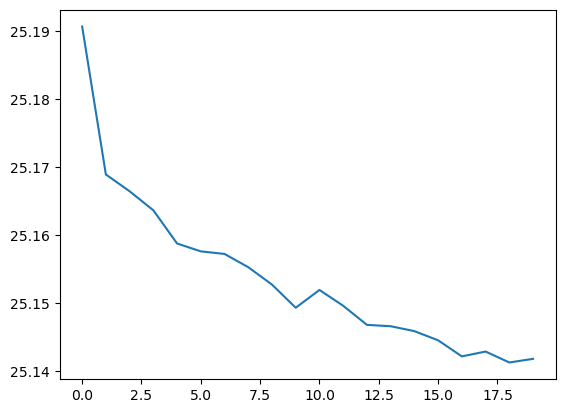

In [51]:
%%time

from matplotlib import pyplot as plt 

epochs = 20
train_losses = []

for epoch in range(epochs):
    train_loss = 0
    correct = 0
    for batch_idx, batch in enumerate(train_loader):
        input = batch[0].to(device)
        input = input.detach()
        target = batch[1].to(device)
        optimizer.zero_grad()
        out = multi_nli_model(input)
        y_pred = torch.argmax(out, dim=1).to(device)
        target1 = []
        for i, j in enumerate(target):
            if j == 0:
                if y_pred[i] == 0:
                    correct += 1
                target1.append(torch.tensor([1.0, 0.0, 0.0]))
            elif j == 1:
                if y_pred[i] == 1:
                    correct += 1
                target1.append(torch.tensor([0.0, 1.0, 0.0]))
            else:
                if y_pred[i] == 2:
                    correct += 1
                target1.append(torch.tensor([0.0, 0.0, 1.0]))
        target1 = torch.stack(target1).to(device)
        loss = loss_fn(out, target1)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_losses.append(train_loss / 64)
    print ('Epoch :', epoch, ', Accuracy :', (correct / len(y_train)))

plt.plot(train_losses)
torch.save(multi_nli_model.state_dict(), 'multi_nli_model.pt')

In [52]:
%%time

num_correct = 0
validation_matched_predictions = []

with torch.no_grad():
    for batch_idx, batch in enumerate(validation_matched_loader):
        input = batch[0].to(device)
        input = input.detach()
        target = batch[1].to(device)
        out = multi_nli_model(input)
        y_pred = torch.argmax(out, dim=1).to(device)
        for i, j in enumerate(target):
            if j == 0:
                if y_pred[i] == 0:
                    num_correct += 1
            elif j == 1:
                if y_pred[i] == 1:
                    num_correct += 1
            else:
                if y_pred[i] == 2:
                    num_correct += 1
            validation_matched_predictions.append(y_pred[i])
    
print ('Validation Matched data Accuracy :', (num_correct / len(y_validation_matched)))

Validation Matched data Accuracy : 0.3383152173913043
CPU times: user 325 ms, sys: 0 ns, total: 325 ms
Wall time: 324 ms


In [53]:
%%time

from sklearn.metrics import confusion_matrix, roc_auc_score

#print (roc_auc_score(torch.tensor(validation_matched_predictions).cpu().data.numpy(), \
#                     torch.tensor(y_validation_matched).cpu().data.numpy()))
print ('Confusion Matrix for the Validation Matched Data :-')
print (confusion_matrix(torch.tensor(validation_matched_predictions).cpu().data.numpy(), \
                        torch.tensor(y_validation_matched).cpu().data.numpy()))

Confusion Matrix for the Validation Matched Data :-
[[ 27  34  34]
 [  2   3   3]
 [994 881 966]]
CPU times: user 33.1 ms, sys: 2 ms, total: 35.1 ms
Wall time: 35.3 ms


In [54]:
%%time

num_correct = 0
validation_mismatched_predictions = []

with torch.no_grad():
    for batch_idx, batch in enumerate(validation_mismatched_loader):
        input = batch[0].to(device)
        input = input.detach()
        target = batch[1].to(device)
        out = multi_nli_model(input)
        y_pred = torch.argmax(out, dim=1).to(device)
        for i, j in enumerate(target):
            if j == 0:
                if y_pred[i] == 0:
                    num_correct += 1
            elif j == 1:
                if y_pred[i] == 1:
                    num_correct += 1
            else:
                if y_pred[i] == 2:
                    num_correct += 1
            validation_mismatched_predictions.append(y_pred[i])
    
print ('Accuracy :', (num_correct / len(y_validation_mismatched)))

Accuracy : 0.31322033898305085
CPU times: user 324 ms, sys: 2 ms, total: 326 ms
Wall time: 326 ms


In [55]:
%%time

#print (roc_auc_score(torch.tensor(validation_mismatched_predictions).cpu().data.numpy(), \
#                     torch.tensor(y_validation_mismatched).cpu().data.numpy()))
print ('Confusion Matrix for the Validation Mismatched Data :-')
print (confusion_matrix(torch.tensor(validation_mismatched_predictions).cpu().data.numpy(), \
                        torch.tensor(y_validation_mismatched).cpu().data.numpy()))

Confusion Matrix for the Validation Mismatched Data :-
[[ 97  80 106]
 [949 805 842]
 [ 22  22  27]]
CPU times: user 34.4 ms, sys: 992 µs, total: 35.4 ms
Wall time: 34.7 ms
